In [1]:
import pandas as pd
from inference_evaluation import calculate_sacrebleu, calculate_xcomet

/home/tmax/anaconda3/envs/qlora/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-20 17:36:52.994329: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 17:36:52.994376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 17:36:52.995212: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 17:36:53.000284: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow bi

In [3]:
sparta = pd.read_csv('../results/test_sparta_bidir_inferenced.csv')
sparta.head()

,tgt,google_trans,google_time,deepl_trans,deepl_time,llama-sparta-qlora_trans,llama-sparta-qlora_time,llama-sparta-qlora-bf16_trans,llama-sparta-qlora-bf16_time,llama-sparta-qlora-bf16-vllm_trans,llama-sparta-qlora-bf16-vllm_time,src,src_token_len,direction,data_source
0,Transnational institutions act as intermediari...,The transnational organization acts as an inte...,1869.401,Supranational organizations act as intermediar...,1146.5,Transnational organizations act as intermediar...,3979.829,Transnational organizations act as intermediar...,1480.720,Transnational organizations act as intermediar...,613.220,초국가 기구는 협상 과정에서 협상 기회를 창출하거나 결정권자들의 갈등을 완화시키는 ...,30,ko-en,aihub-71266
1,초국가 기구는 협상 과정에서 협상 기회를 창출하거나 결정권자들의 갈등을 완화시키는 ...,초 국가 기관은 협상 기회를 창출하거나 의사 결정자들 사이의 갈등을 완화함으로써 협...,545.195,초국적 기관은 협상 기회를 창출하거나 의사 결정자 간의 갈등을 완화하여 협상 과정에...,664.3,초국적 기구는 협상기회를 창출하거나 결정자 간의 갈등을 완화함으로써 협상과정에서 공...,2225.354,초국적 기구는 협상기회를 창출하거나 결정자 간의 갈등을 완화함으로써 협상과정에서 공...,756.085,초국적 기관은 협상기회를 창출하거나 결정자 간의 갈등을 완화함으로써 협상과정에서 공...,515.830,Transnational institutions act as intermediari...,37,en-ko,aihub-71266
2,So what are you going to choose?,So what are you going to choose?,260.300,So what are you going to pick?,392.8,So what are you going to choose?,623.845,So what are you going to choose?,210.805,So what are you going to choose?,141.181,그래서 뭐 고를 건데?,6,ko-en,aihub-71265
3,그래서 뭐 고를 건데?,그래서 무엇을 선택 하시겠습니까?,225.300,그렇다면 무엇을 선택하시겠습니까?,375.2,그래서 당신은 무엇을 선택할 건가요?,622.931,그래서 당신은 무엇을 선택할 건가요?,208.226,그래서 당신은 무엇을 선택할 건가요?,141.312,So what are you going to choose?,8,en-ko,aihub-71265
4,"This is because, at that time, a lawsuit about...",This is because a lawsuit related to the estab...,216.200,"At the time, a lawsuit was filed between the p...",480.0,This is because a lawsuit related to the estab...,2761.580,This is because a lawsuit related to the estab...,938.748,This is because a lawsuit related to the estab...,639.354,당시 사업주체인 Y22프로젝트파이낸싱인베스트먼트와 토지 소유주인 통일교재단 사이에 ...,38,ko-en,aihub-111


In [4]:
aihub_ko2en = sparta[(sparta['direction'] == 'ko-en') & (sparta['data_source'].str.startswith('aihub'))]
aihub_en2ko = sparta[(sparta['direction'] == 'en-ko') & (sparta['data_source'].str.startswith('aihub'))]
flores_ko2en = sparta[(sparta['direction'] == 'ko-en') & (sparta['data_source'].str.startswith('flores'))]
flores_en2ko = sparta[(sparta['direction'] == 'en-ko') & (sparta['data_source'].str.startswith('flores'))]

In [6]:
translator_dict = {
    'google': 'google',
    'deepl': 'deepl',
    'qlora': 'llama-sparta-qlora',
    'bf16': 'llama-sparta-qlora-bf16',
    'vllm': 'llama-sparta-qlora-bf16-vllm'
}

In [9]:
translator_order = [
    'google',
    'deepl',
    'qlora',
    'bf16',
    'vllm',
]

In [12]:
aihub_ko2en_sacrebleu_dict = {
    trans: calculate_sacrebleu(aihub_ko2en, column_name=f'{translator_dict[trans]}_trans', ref_col='tgt') for trans in translator_order
}
aihub_en2ko_sacrebleu_dict = {
    trans: calculate_sacrebleu(aihub_en2ko, column_name=f'{translator_dict[trans]}_trans', ref_col='tgt') for trans in translator_order
}
flores_ko2en_sacrebleu_dict = {
    trans: calculate_sacrebleu(flores_ko2en, column_name=f'{translator_dict[trans]}_trans', ref_col='tgt') for trans in translator_order
}
flores_en2ko_sacrebleu_dict = {
    trans: calculate_sacrebleu(flores_en2ko, column_name=f'{translator_dict[trans]}_trans', ref_col='tgt') for trans in translator_order
}

In [13]:
aihub_ko2en_xcomet_dict = {
    trans: calculate_xcomet(aihub_ko2en, column_name=f'{translator_dict[trans]}_trans', src_col='src', ref_col='tgt') for trans in translator_order
}
aihub_en2ko_xcomet_dict = {
    trans: calculate_xcomet(aihub_en2ko, column_name=f'{translator_dict[trans]}_trans', src_col='src', ref_col='tgt') for trans in translator_order
}
flores_ko2en_xcomet_dict = {
    trans: calculate_xcomet(flores_ko2en, column_name=f'{translator_dict[trans]}_trans', src_col='src', ref_col='tgt') for trans in translator_order
}
flores_en2ko_xcomet_dict = {
    trans: calculate_xcomet(flores_en2ko, column_name=f'{translator_dict[trans]}_trans', src_col='src', ref_col='tgt') for trans in translator_order
}

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 37315.87it/s]
Encoder model frozen.
/home/tmax/anaconda3/envs/qlora/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:188: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]
Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 52428.80it/s]
Encoder model frozen.
/home/tmax/anaconda3/envs/qlora/lib/python3.11/site-

In [14]:
ko2en_sacrebleu_dict = {
    'aihub': aihub_ko2en_sacrebleu_dict,
    'flores': flores_ko2en_sacrebleu_dict
}
en2ko_sacrebleu_dict = {
    'aihub': aihub_en2ko_sacrebleu_dict,
    'flores': flores_en2ko_sacrebleu_dict
}
ko2en_xcomet_dict = {
    'aihub': aihub_ko2en_xcomet_dict,
    'flores': flores_ko2en_xcomet_dict
}
en2ko_xcomet_dict = {
    'aihub': aihub_en2ko_xcomet_dict,
    'flores': flores_en2ko_xcomet_dict
}

In [15]:
ko2en_dict = {
    'sacrebleu': ko2en_sacrebleu_dict,
    'xcomet': ko2en_xcomet_dict
}
en2ko_dict = {
    'sacrebleu': en2ko_sacrebleu_dict,
    'xcomet': en2ko_xcomet_dict
}

In [16]:
sparta_dict = {
    'ko2en': ko2en_dict,
    'en2ko': en2ko_dict
}

In [17]:
sparta_dict

{'ko2en': {'sacrebleu': {'aihub': {'google': 29.958785725966973,
    'deepl': 37.674554602961734,
    'qlora': 46.34711032718279,
    'bf16': 45.98828805006235,
    'vllm': 45.181662593647694},
   'flores': {'google': 22.062879951008398,
    'deepl': 34.478829853950884,
    'qlora': 28.802758121765923,
    'bf16': 29.003011397501446,
    'vllm': 29.339917716754517}},
  'xcomet': {'aihub': {'google': 72.69311681669205,
    'deepl': 86.27363581955433,
    'qlora': 87.57523798476905,
    'bf16': 87.5624388474971,
    'vllm': 87.32337456801906},
   'flores': {'google': 80.57166093587875,
    'deepl': 95.57791349291801,
    'qlora': 93.88737174868584,
    'bf16': 93.97803145647049,
    'vllm': 93.82300746440887}}},
 'en2ko': {'sacrebleu': {'aihub': {'google': 11.274768944504158,
    'deepl': 21.82190052828196,
    'qlora': 27.97283775205161,
    'bf16': 27.961557711747364,
    'vllm': 27.43788622842319},
   'flores': {'google': 10.762742239808397,
    'deepl': 16.94057362378887,
    'qlora'

In [18]:
# sparta_dict를 yaml로 저장
import yaml
with open('../results/test_sparta_bidir_metrics.yaml', 'w') as f:
    yaml.dump(sparta_dict, f, default_flow_style=False)

In [20]:
# aihub_ko2en, aihub_en2ko, flores_ko2en, flores_en2ko
aihub_ko2en_token_len = aihub_ko2en['src_token_len']
aihub_en2ko_token_len = aihub_en2ko['src_token_len']
flores_ko2en_token_len = flores_ko2en['src_token_len']
flores_en2ko_token_len = flores_en2ko['src_token_len']

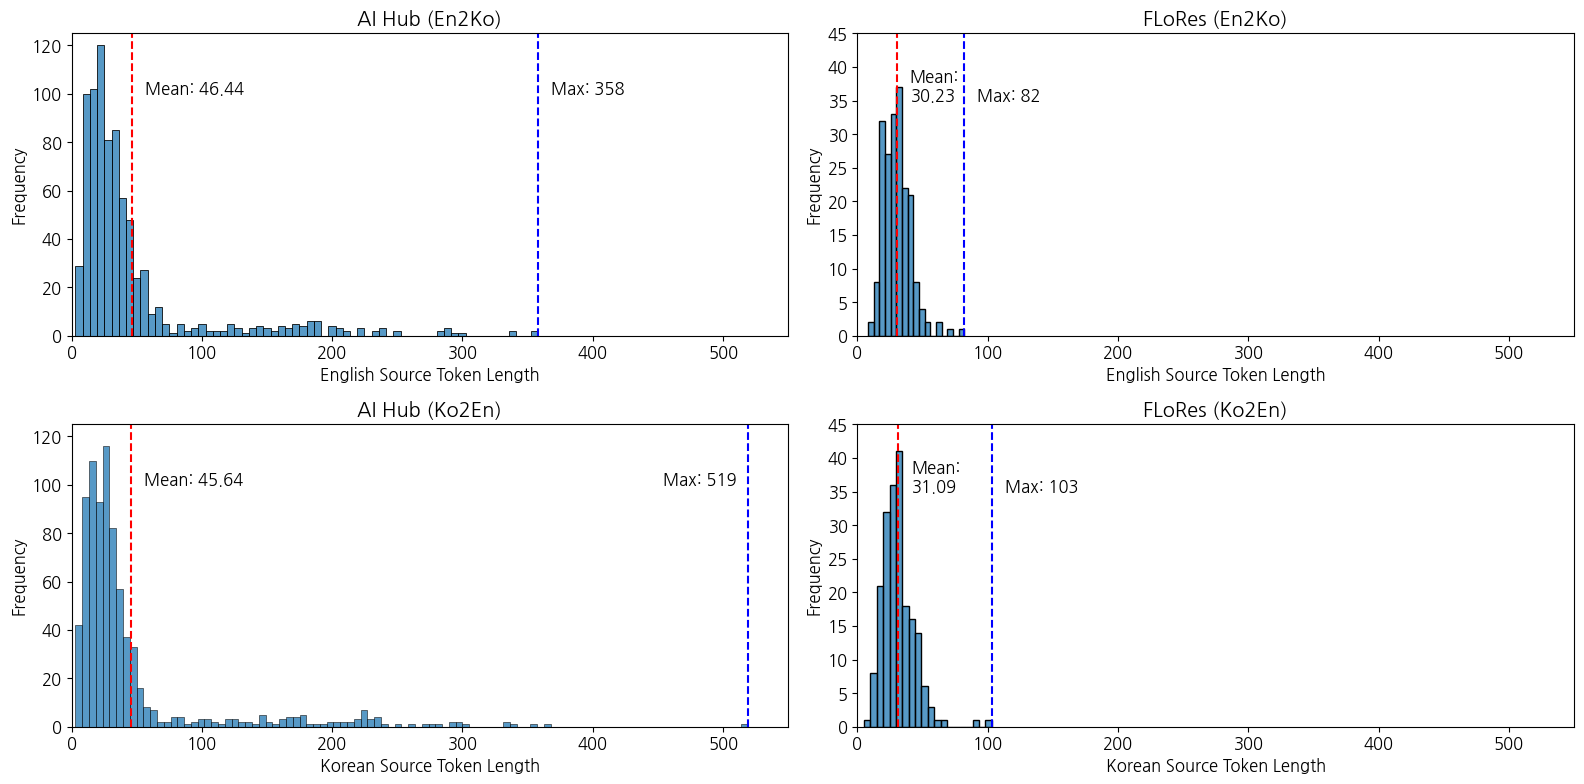

: 

In [58]:
# token_len을 histogram으로 plot
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
plt.rcParams.update({'font.size': 12})

sns.histplot(aihub_en2ko_token_len, ax=axes[0, 0])
axes[0, 0].set_title('AI Hub (En2Ko)')
axes[0, 0].set_xlabel('English Source Token Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlim(0, 550)
axes[0, 0].set_ylim(0, 125)
axes[0, 0].axvline(aihub_en2ko_token_len.mean(), color='r', linestyle='--')
axes[0, 0].text(aihub_en2ko_token_len.mean() + 10, 100, f'Mean: {aihub_en2ko_token_len.mean():.2f}')
axes[0, 0].axvline(aihub_en2ko_token_len.max(), color='b', linestyle='--')
axes[0, 0].text(aihub_en2ko_token_len.max() + 10, 100, f'Max: {aihub_en2ko_token_len.max()}')

sns.histplot(aihub_ko2en_token_len, ax=axes[1, 0])
axes[1, 0].set_title('AI Hub (Ko2En)')
axes[1, 0].set_xlabel('Korean Source Token Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xlim(0, 550)
axes[1, 0].set_ylim(0, 125)
axes[1, 0].axvline(aihub_ko2en_token_len.mean(), color='r', linestyle='--')
axes[1, 0].text(aihub_ko2en_token_len.mean() + 10, 100, f'Mean: {aihub_ko2en_token_len.mean():.2f}')
axes[1, 0].axvline(aihub_ko2en_token_len.max(), color='b', linestyle='--')
axes[1, 0].text(aihub_ko2en_token_len.max() - 65, 100, f'Max: {aihub_ko2en_token_len.max()}')

sns.histplot(flores_en2ko_token_len, ax=axes[0, 1])
axes[0, 1].set_title('FLoRes (En2Ko)')
axes[0, 1].set_xlabel('English Source Token Length')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim(0, 550)
axes[0, 1].set_ylim(0, 45)
axes[0, 1].axvline(flores_en2ko_token_len.mean(), color='r', linestyle='--')
axes[0, 1].text(flores_en2ko_token_len.mean() + 10, 35, f'Mean:\n{flores_en2ko_token_len.mean():.2f}')
axes[0, 1].axvline(flores_en2ko_token_len.max(), color='b', linestyle='--')
axes[0, 1].text(flores_en2ko_token_len.max() + 10, 35, f'Max: {flores_en2ko_token_len.max()}')

sns.histplot(flores_ko2en_token_len, ax=axes[1, 1])
axes[1, 1].set_title('FLoRes (Ko2En)')
axes[1, 1].set_xlabel('Korean Source Token Length')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim(0, 550)
axes[1, 1].set_ylim(0, 45)
axes[1, 1].axvline(flores_ko2en_token_len.mean(), color='r', linestyle='--')
axes[1, 1].text(flores_ko2en_token_len.mean() + 10, 35, f'Mean:\n{flores_ko2en_token_len.mean():.2f}')
axes[1, 1].axvline(flores_ko2en_token_len.max(), color='b', linestyle='--')
axes[1, 1].text(flores_ko2en_token_len.max() + 10, 35, f'Max: {flores_ko2en_token_len.max()}')

plt.tight_layout()
plt.show()

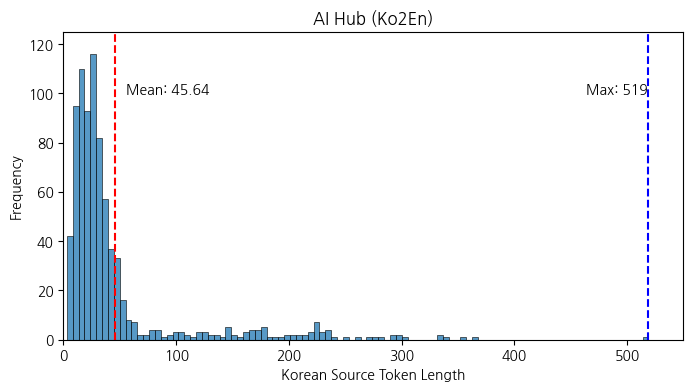

In [48]:
plt.figure(figsize=(8, 4))
sns.histplot(aihub_ko2en_token_len)
plt.title('AI Hub (Ko2En)')
plt.xlabel('Korean Source Token Length')
plt.ylabel('Frequency')
plt.xlim(0, 550)
plt.ylim(0, 125)
plt.axvline(aihub_ko2en_token_len.mean(), color='r', linestyle='--')
plt.text(aihub_ko2en_token_len.mean() + 10, 100, f'Mean: {aihub_ko2en_token_len.mean():.2f}')
plt.axvline(aihub_ko2en_token_len.max(), color='b', linestyle='--')
plt.text(aihub_ko2en_token_len.max() - 55, 100, f'Max: {aihub_ko2en_token_len.max()}')
plt.show()

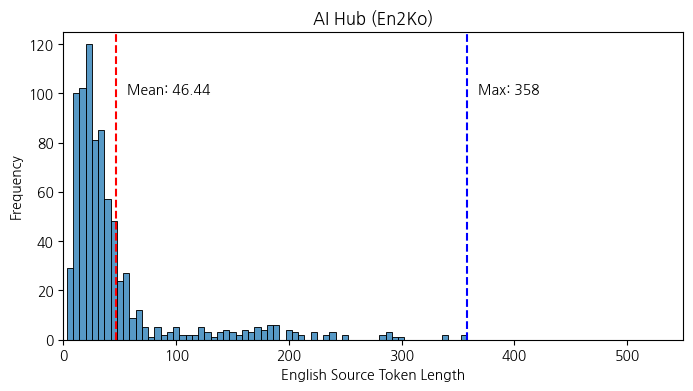

In [49]:
plt.figure(figsize=(8, 4))
sns.histplot(aihub_en2ko_token_len)
plt.title('AI Hub (En2Ko)')
plt.xlabel('English Source Token Length')
plt.ylabel('Frequency')
plt.xlim(0, 550)
plt.ylim(0, 125)
plt.axvline(aihub_en2ko_token_len.mean(), color='r', linestyle='--')
plt.text(aihub_en2ko_token_len.mean() + 10, 100, f'Mean: {aihub_en2ko_token_len.mean():.2f}')
plt.axvline(aihub_en2ko_token_len.max(), color='b', linestyle='--')
plt.text(aihub_en2ko_token_len.max() + 10, 100, f'Max: {aihub_en2ko_token_len.max()}')
plt.show()

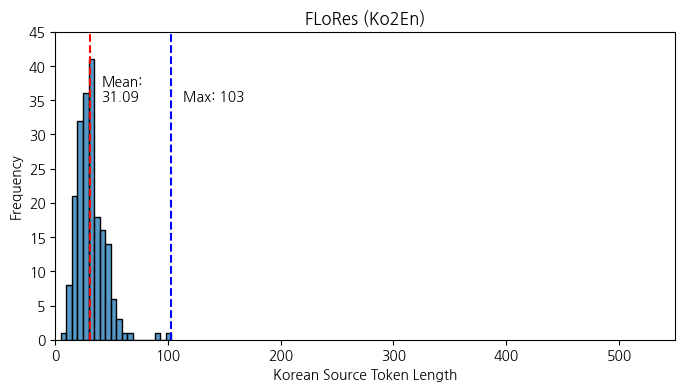

In [50]:
plt.figure(figsize=(8, 4))
sns.histplot(flores_ko2en_token_len)
plt.title('FLoRes (Ko2En)')
plt.xlabel('Korean Source Token Length')
plt.ylabel('Frequency')
plt.xlim(0, 550)
plt.ylim(0, 45)
plt.axvline(flores_ko2en_token_len.mean(), color='r', linestyle='--')
plt.text(flores_ko2en_token_len.mean() + 10, 35, f'Mean:\n{flores_ko2en_token_len.mean():.2f}')
plt.axvline(flores_ko2en_token_len.max(), color='b', linestyle='--')
plt.text(flores_ko2en_token_len.max() + 10, 35, f'Max: {flores_ko2en_token_len.max()}')
plt.show()

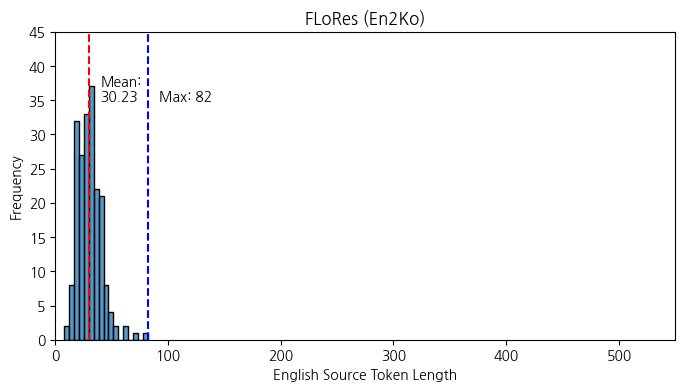

In [51]:
plt.figure(figsize=(8, 4))
sns.histplot(flores_en2ko_token_len)
plt.title('FLoRes (En2Ko)')
plt.xlabel('English Source Token Length')
plt.ylabel('Frequency')
plt.xlim(0, 550)
plt.ylim(0, 45)
plt.axvline(flores_en2ko_token_len.mean(), color='r', linestyle='--')
plt.text(flores_en2ko_token_len.mean() + 10, 35, f'Mean:\n{flores_en2ko_token_len.mean():.2f}')
plt.axvline(flores_en2ko_token_len.max(), color='b', linestyle='--')
plt.text(flores_en2ko_token_len.max() + 10, 35, f'Max: {flores_en2ko_token_len.max()}')
plt.show()

In [2]:
import pandas as pd

In [5]:
sparta = pd.read_csv('../results/test_sparta_bidir_inferenced.csv')
sparta.columns

Index(['tgt', 'google_trans', 'google_time', 'deepl_trans', 'deepl_time',
       'llama-sparta-qlora_trans', 'llama-sparta-qlora_time',
       'llama-sparta-qlora-bf16_trans', 'llama-sparta-qlora-bf16_time',
       'llama-sparta-qlora-bf16-vllm_trans',
       'llama-sparta-qlora-bf16-vllm_time', 'src', 'src_token_len',
       'direction', 'data_source', 'papago_trans', 'papago_time'],
      dtype='object')

In [6]:
sparta = sparta[[
    'tgt',
    'google_trans',
    'google_time',
    'deepl_trans',
    'deepl_time',
    'papago_trans',
    'papago_time',
    'llama-sparta-qlora_trans',
    'llama-sparta-qlora_time',
    'llama-sparta-qlora-bf16_trans',
    'llama-sparta-qlora-bf16_time',
    'llama-sparta-qlora-bf16-vllm_trans',
    'llama-sparta-qlora-bf16-vllm_time',
    'src',
    'src_token_len',
    'direction',
    'data_source',
]]
sparta.head()

,tgt,google_trans,google_time,deepl_trans,deepl_time,papago_trans,papago_time,llama-sparta-qlora_trans,llama-sparta-qlora_time,llama-sparta-qlora-bf16_trans,llama-sparta-qlora-bf16_time,llama-sparta-qlora-bf16-vllm_trans,llama-sparta-qlora-bf16-vllm_time,src,src_token_len,direction,data_source
0,Transnational institutions act as intermediari...,The transnational organization acts as an inte...,1869.401,Supranational organizations act as intermediar...,1146.5,Transnational organizations act as intermediar...,282.7,Transnational organizations act as intermediar...,3979.829,Transnational organizations act as intermediar...,1480.720,Transnational organizations act as intermediar...,613.220,초국가 기구는 협상 과정에서 협상 기회를 창출하거나 결정권자들의 갈등을 완화시키는 ...,30,ko-en,aihub-71266
1,초국가 기구는 협상 과정에서 협상 기회를 창출하거나 결정권자들의 갈등을 완화시키는 ...,초 국가 기관은 협상 기회를 창출하거나 의사 결정자들 사이의 갈등을 완화함으로써 협...,545.195,초국적 기관은 협상 기회를 창출하거나 의사 결정자 간의 갈등을 완화하여 협상 과정에...,664.3,초국가적 제도는 협상 기회를 창출하거나 의사결정자 간의 갈등을 완화함으로써 협상 과...,352.8,초국적 기구는 협상기회를 창출하거나 결정자 간의 갈등을 완화함으로써 협상과정에서 공...,2225.354,초국적 기구는 협상기회를 창출하거나 결정자 간의 갈등을 완화함으로써 협상과정에서 공...,756.085,초국적 기관은 협상기회를 창출하거나 결정자 간의 갈등을 완화함으로써 협상과정에서 공...,515.830,Transnational institutions act as intermediari...,37,en-ko,aihub-71266
2,So what are you going to choose?,So what are you going to choose?,260.300,So what are you going to pick?,392.8,So what are you going to choose?,206.1,So what are you going to choose?,623.845,So what are you going to choose?,210.805,So what are you going to choose?,141.181,그래서 뭐 고를 건데?,6,ko-en,aihub-71265
3,그래서 뭐 고를 건데?,그래서 무엇을 선택 하시겠습니까?,225.300,그렇다면 무엇을 선택하시겠습니까?,375.2,그래서 무엇을 선택하실 건가요?,161.0,그래서 당신은 무엇을 선택할 건가요?,622.931,그래서 당신은 무엇을 선택할 건가요?,208.226,그래서 당신은 무엇을 선택할 건가요?,141.312,So what are you going to choose?,8,en-ko,aihub-71265
4,"This is because, at that time, a lawsuit about...",This is because a lawsuit related to the estab...,216.200,"At the time, a lawsuit was filed between the p...",480.0,"At that time, a lawsuit was filed between Y22 ...",370.9,This is because a lawsuit related to the estab...,2761.580,This is because a lawsuit related to the estab...,938.748,This is because a lawsuit related to the estab...,639.354,당시 사업주체인 Y22프로젝트파이낸싱인베스트먼트와 토지 소유주인 통일교재단 사이에 ...,38,ko-en,aihub-111


In [7]:
sparta.to_csv('../results/test_sparta_bidir_inferenced.csv', index=False)

In [8]:
aihub_ko2en = sparta[(sparta['direction'] == 'ko-en') & (sparta['data_source'].str.startswith('aihub'))]
aihub_en2ko = sparta[(sparta['direction'] == 'en-ko') & (sparta['data_source'].str.startswith('aihub'))]
flores_ko2en = sparta[(sparta['direction'] == 'ko-en') & (sparta['data_source'].str.startswith('flores'))]
flores_en2ko = sparta[(sparta['direction'] == 'en-ko') & (sparta['data_source'].str.startswith('flores'))]

In [12]:
from inference_evaluation import calculate_sacrebleu, calculate_xcomet

In [13]:
papago_aihub_ko2en_sacrebleu = calculate_sacrebleu(aihub_ko2en, column_name='papago_trans', ref_col='tgt')
papago_flores_ko2en_sacrebleu = calculate_sacrebleu(flores_ko2en, column_name='papago_trans', ref_col='tgt')
papago_aihub_ko2en_xcomet = calculate_xcomet(aihub_ko2en, column_name='papago_trans', src_col='src', ref_col='tgt')
papago_flores_ko2en_xcomet = calculate_xcomet(flores_ko2en, column_name='papago_trans', src_col='src', ref_col='tgt')

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 46916.15it/s]
Encoder model frozen.
/home/tmax/anaconda3/envs/qlora/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:188: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]
Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 41363.94it/s]
Encoder model frozen.
/home/tmax/anaconda3/envs/qlora/lib/python3.11/site-

In [31]:
print(f"AI Hub (Ko2En) Papago SacreBLEU: {papago_aihub_ko2en_sacrebleu}")
print(f"FLoRes (Ko2En) Papago SacreBLEU: {papago_flores_ko2en_sacrebleu}")
print(f"AI Hub (Ko2En) Papago xCOMET: {papago_aihub_ko2en_xcomet}")
print(f"FLoRes (Ko2En) Papago xCOMET: {papago_flores_ko2en_xcomet}")

AI Hub (Ko2En) Papago SacreBLEU: 43.5877564430919
FLoRes (Ko2En) Papago SacreBLEU: 59.00718042711329
AI Hub (Ko2En) Papago xCOMET: 86.56624203547835
FLoRes (Ko2En) Papago xCOMET: 94.66319260001183


In [18]:
papago_aihub_ko2en_time_sum = aihub_ko2en['papago_time'].sum() / 1000
papago_flores_ko2en_time_sum = flores_ko2en['papago_time'].sum() / 1000
papago_aihub_ko2en_token_sum = aihub_ko2en['src_token_len'].sum()
papago_flores_ko2en_token_sum = flores_ko2en['src_token_len'].sum()

In [20]:
print(f"AI Hub (Ko2En) Papago Inference Time: {papago_aihub_ko2en_time_sum:.2f} sec")
print(f"FLoRes (Ko2En) Papago Inference Time: {papago_flores_ko2en_time_sum:.2f} sec")
print(f"AI Hub (Ko2En) Papago Token Sum: {papago_aihub_ko2en_token_sum}")
print(f"FLoRes (Ko2En) Papago Token Sum: {papago_flores_ko2en_token_sum}")

AI Hub (Ko2En) Papago Inference Time: 303.90 sec
FLoRes (Ko2En) Papago Inference Time: 42.72 sec
AI Hub (Ko2En) Papago Token Sum: 36515
FLoRes (Ko2En) Papago Token Sum: 6218


In [21]:
print(f"AI Hub (Ko2En) Papago Mean Tokens per Time: {papago_aihub_ko2en_token_sum / papago_aihub_ko2en_time_sum:.2f}")
print(f"FLoRes (Ko2En) Papago Mean Tokens per Time: {papago_flores_ko2en_token_sum / papago_flores_ko2en_time_sum:.2f}")

AI Hub (Ko2En) Papago Mean Tokens per Time: 120.16
FLoRes (Ko2En) Papago Mean Tokens per Time: 145.54


In [32]:
papago_aihub_en2ko_sacrebleu = calculate_sacrebleu(aihub_en2ko, column_name='papago_trans', ref_col='tgt')
papago_flores_en2ko_sacrebleu = calculate_sacrebleu(flores_en2ko, column_name='papago_trans', ref_col='tgt')
papago_aihub_en2ko_xcomet = calculate_xcomet(aihub_en2ko, column_name='papago_trans', src_col='src', ref_col='tgt')
papago_flores_en2ko_xcomet = calculate_xcomet(flores_en2ko, column_name='papago_trans', src_col='src', ref_col='tgt')

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 53773.13it/s]
Encoder model frozen.
/home/tmax/anaconda3/envs/qlora/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:188: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]
Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 52692.26it/s]
Encoder model frozen.
/home/tmax/anaconda3/envs/qlora/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:188: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]
Predicting

In [33]:
print(f"AI Hub (En2Ko) Papago SacreBLEU: {papago_aihub_en2ko_sacrebleu}")
print(f"FLoRes (En2Ko) Papago SacreBLEU: {papago_flores_en2ko_sacrebleu}")
print(f"AI Hub (En2Ko) Papago xCOMET: {papago_aihub_en2ko_xcomet}")
print(f"FLoRes (En2Ko) Papago xCOMET: {papago_flores_en2ko_xcomet}")

AI Hub (En2Ko) Papago SacreBLEU: 27.61976780686114
FLoRes (En2Ko) Papago SacreBLEU: 50.808201526796005
AI Hub (En2Ko) Papago xCOMET: 88.27746153250337
FLoRes (En2Ko) Papago xCOMET: 90.49753913283348


In [34]:
papago_aihub_en2ko_time_sum = aihub_en2ko['papago_time'].sum() / 1000
papago_flores_en2ko_time_sum = flores_en2ko['papago_time'].sum() / 1000
papago_aihub_en2ko_token_sum = aihub_en2ko['src_token_len'].sum()
papago_flores_en2ko_token_sum = flores_en2ko['src_token_len'].sum()

In [36]:
print(f"AI Hub (En2Ko) Papago Inference Time: {papago_aihub_en2ko_time_sum:.2f} sec")
print(f"FLoRes (En2Ko) Papago Inference Time: {papago_flores_en2ko_time_sum:.2f} sec")
print(f"AI Hub (En2Ko) Papago Token Sum: {papago_aihub_en2ko_token_sum}")
print(f"FLoRes (En2Ko) Papago Token Sum: {papago_flores_en2ko_token_sum}")

AI Hub (En2Ko) Papago Inference Time: 274.60 sec
FLoRes (En2Ko) Papago Inference Time: 41.77 sec
AI Hub (En2Ko) Papago Token Sum: 37148
FLoRes (En2Ko) Papago Token Sum: 6045


In [37]:
print(f"AI Hub (En2Ko) Papago Mean Tokens per Time: {papago_aihub_en2ko_token_sum / papago_aihub_en2ko_time_sum:.2f}")
print(f"FLoRes (En2Ko) Papago Mean Tokens per Time: {papago_flores_en2ko_token_sum / papago_flores_en2ko_time_sum:.2f}")

AI Hub (En2Ko) Papago Mean Tokens per Time: 135.28
FLoRes (En2Ko) Papago Mean Tokens per Time: 144.70


: 